# Import shuffled_data.csv file



In [3]:
import pandas as pd 

file_path = "../csvs/shuffled_data.csv"

data = pd.read_csv(file_path)

allDatapoints = data.iloc[:, :-1]
labels = data.iloc[:, -1]

# Number of training data points (80% of the data)
N = allDatapoints.shape[0] // 5 * 4

# Training data
trainData = allDatapoints.iloc[:N]

# Testing data
testData = allDatapoints.iloc[N:]

assert trainData.shape[0] + testData.shape[0] == allDatapoints.shape[0]

# Use K-Means from scikit-learn

In [7]:
# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

# imports
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score, fowlkes_mallows_score, silhouette_score
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt

In [4]:
# K-Means Clustering
k_values = [2,3,4,5,6,7,8,9,10]

models = {}
completeness_scores = {}
fowlkes_mallows_scores = {}
silhouette_scores = {}

for k in k_values:
    # Train the model

    model = KMeans(n_clusters=k, random_state=5)

    models[k] = model.fit(trainData)

    # Predict the clusters for the test data
    test_clusters = models[k].predict(testData)

    # Calculate the completeness score for the test data
    completeness = completeness_score(labels[N:], test_clusters)
    completeness_scores[k] = completeness

    # Calculate the Fowlkes-Mallows score for the test data
    fowlkes_mallows = fowlkes_mallows_score(labels[N:], test_clusters)
    fowlkes_mallows_scores[k] = fowlkes_mallows

    silhouette = silhouette_score(testData, test_clusters)
    silhouette_scores[k] = silhouette

for k, score in completeness_scores.items():
    print(f'Completeness Score for k={k}: {score}')

for k, score in fowlkes_mallows_scores.items():
    print(f'Fowlkes-Mallows Score for k={k}: {score}')

for k, score in silhouette_scores.items():
    print(f'Silhouette Score for k={k}: {score}')

Completeness Score for k=2: 0.018117128589818638
Completeness Score for k=3: 0.043470632690230146
Completeness Score for k=4: 0.04074987705657431
Completeness Score for k=5: 0.05866281930270628
Completeness Score for k=6: 0.06161385504526717
Completeness Score for k=7: 0.055907773718877785
Completeness Score for k=8: 0.07256739362305832
Completeness Score for k=9: 0.06300157228193819
Completeness Score for k=10: 0.07295345771880866
Fowlkes-Mallows Score for k=2: 0.5241381465778961
Fowlkes-Mallows Score for k=3: 0.45166833375313054
Fowlkes-Mallows Score for k=4: 0.4127323863908567
Fowlkes-Mallows Score for k=5: 0.36734859581044654
Fowlkes-Mallows Score for k=6: 0.3437372711685683
Fowlkes-Mallows Score for k=7: 0.3129704356759573
Fowlkes-Mallows Score for k=8: 0.3057677802573984
Fowlkes-Mallows Score for k=9: 0.2867461568228817
Fowlkes-Mallows Score for k=10: 0.2799825041624532
Silhouette Score for k=2: 0.4612379989597102
Silhouette Score for k=3: 0.36767881774562156
Silhouette Score for

# Plotting

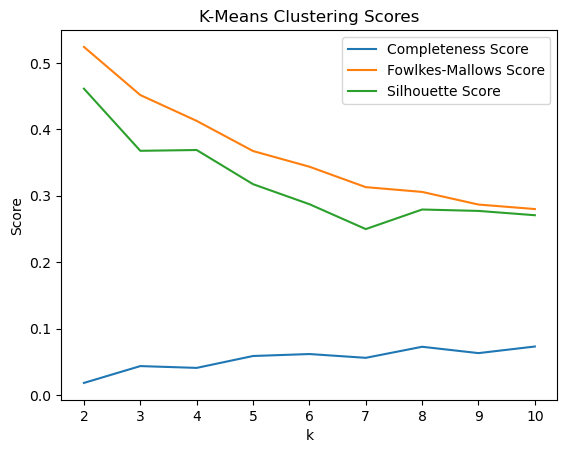

In [5]:
# Plot the scores
import matplotlib.pyplot as plt

plt.plot(completeness_scores.keys(), completeness_scores.values(), label='Completeness Score')
plt.plot(fowlkes_mallows_scores.keys(), fowlkes_mallows_scores.values(), label='Fowlkes-Mallows Score')
plt.plot(silhouette_scores.keys(), silhouette_scores.values(), label='Silhouette Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('K-Means Clustering Scores')
plt.legend()
plt.show()

Let's see results for GMM

In [10]:
# K-Means Clustering
k_values = [2,3,4,5,6,7,8,9,10]

models = {}
completeness_scores = {}
fowlkes_mallows_scores = {}
silhouette_scores = {}

for k in k_values:
    # Train the model

    model = GaussianMixture(n_components=k, random_state=5)

    models[k] = model.fit(trainData)

    # Predict the clusters for the test data
    test_clusters = models[k].predict(testData)

    # Calculate the completeness score for the test data
    completeness = completeness_score(labels[N:], test_clusters)
    completeness_scores[k] = completeness

    # Calculate the Fowlkes-Mallows score for the test data
    fowlkes_mallows = fowlkes_mallows_score(labels[N:], test_clusters)
    fowlkes_mallows_scores[k] = fowlkes_mallows

    silhouette = silhouette_score(testData, test_clusters)
    silhouette_scores[k] = silhouette

for k, score in completeness_scores.items():
    print(f'Completeness Score for k={k}: {score}')

for k, score in fowlkes_mallows_scores.items():
    print(f'Fowlkes-Mallows Score for k={k}: {score}')

for k, score in silhouette_scores.items():
    print(f'Silhouette Score for k={k}: {score}')

Completeness Score for k=2: 0.013359543543335638
Completeness Score for k=3: 0.03888056817198983
Completeness Score for k=4: 0.037612279510711916
Completeness Score for k=5: 0.07078842283103999
Completeness Score for k=6: 0.06782519781665103
Completeness Score for k=7: 0.06782519781665103
Completeness Score for k=8: 0.05547195420846043
Completeness Score for k=9: 0.05948466240961099
Completeness Score for k=10: 0.1266592059182075
Fowlkes-Mallows Score for k=2: 0.5960741826270014
Fowlkes-Mallows Score for k=3: 0.5379715964137788
Fowlkes-Mallows Score for k=4: 0.5360503107940248
Fowlkes-Mallows Score for k=5: 0.5073458819925843
Fowlkes-Mallows Score for k=6: 0.5047325444611639
Fowlkes-Mallows Score for k=7: 0.5047325444611639
Fowlkes-Mallows Score for k=8: 0.41797767946417236
Fowlkes-Mallows Score for k=9: 0.41484897419062944
Fowlkes-Mallows Score for k=10: 0.43062903794239193
Silhouette Score for k=2: -0.0712850205511501
Silhouette Score for k=3: -0.045778461021667105
Silhouette Score f

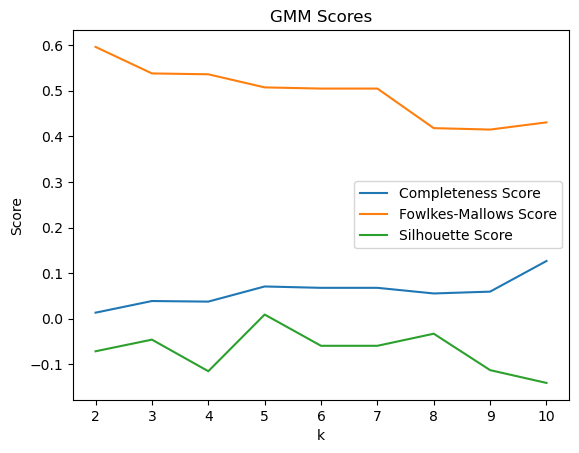

In [7]:

plt.plot(completeness_scores.keys(), completeness_scores.values(), label='Completeness Score')
plt.plot(fowlkes_mallows_scores.keys(), fowlkes_mallows_scores.values(), label='Fowlkes-Mallows Score')
plt.plot(silhouette_scores.keys(), silhouette_scores.values(), label='Silhouette Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('GMM Scores')
plt.legend()
plt.show()

We have only 2 labels and hence, we should use K=2 and n_components=2 in our models. Using this we can get a simple classification model too. Since it is an unsupervised model, we can train without using labels and test on entire dataset with the labels

In [8]:
model = KMeans(n_clusters=2, random_state=5)

model = model.fit(allDatapoints)

# Predict the clusters for the test data
test_clusters = model.predict(allDatapoints)
acc = sum(test_clusters == labels)/len(allDatapoints)
print("K Means Accuracy=",max(acc, 1-acc))

K Means Accuracy= 0.577897160399079


In [9]:
model = GaussianMixture(n_components=2, random_state=5)

model = model.fit(allDatapoints)

# Predict the clusters for the test data
test_clusters = model.predict(allDatapoints)
acc = sum(test_clusters == labels)/len(allDatapoints)
print("GMM Accuracy=",max(acc, 1-acc))

GMM Accuracy= 0.5671527244819647


In [11]:
# Select the desired features
selected_features = ['restingBP', 'fastingbloodsugar', 'chestpain', 'age', 'serumcholestrol']
k_values = [2,3,4,5,6,7,8,9,10]
# Initialize dictionaries to store scores and models
models_5features = {}
completeness_scores_5features = {}
fowlkes_mallows_scores_5features = {}
silhouette_scores_5features = {}

models_4features = {}
completeness_scores_4features = {}
fowlkes_mallows_scores_4features = {}
silhouette_scores_4features = {}

models_3features = {}
completeness_scores_3features = {}
fowlkes_mallows_scores_3features = {}
silhouette_scores_3features = {}

models_2features = {}
completeness_scores_2features = {}
fowlkes_mallows_scores_2features = {}
silhouette_scores_2features = {}

# Perform K-Means clustering with decreasing number of features
for i in range(len(selected_features), 1, -1):
    current_features = selected_features[:i]
    current_data = data[current_features]
    
    for k in k_values:
        gmm = GaussianMixture(n_components=k, random_state=5)
        gmm.fit(current_data)
        clusters = gmm.predict(current_data)
        
        if i == 5:
            models_5features[f'k={k}'] = gmm
            completeness_scores_5features[f'k={k}'] = completeness_score(labels, clusters)
            fowlkes_mallows_scores_5features[f'k={k}'] = fowlkes_mallows_score(labels, clusters)
            silhouette_scores_5features[f'k={k}'] = silhouette_score(current_data, clusters)
        elif i == 4:
            models_4features[f'k={k}'] = gmm
            completeness_scores_4features[f'k={k}'] = completeness_score(labels, clusters)
            fowlkes_mallows_scores_4features[f'k={k}'] = fowlkes_mallows_score(labels, clusters)
            silhouette_scores_4features[f'k={k}'] = silhouette_score(current_data, clusters)
        elif i == 3:
            models_3features[f'k={k}'] = gmm
            completeness_scores_3features[f'k={k}'] = completeness_score(labels, clusters)
            fowlkes_mallows_scores_3features[f'k={k}'] = fowlkes_mallows_score(labels, clusters)
            silhouette_scores_3features[f'k={k}'] = silhouette_score(current_data, clusters)
        elif i == 2:
            models_2features[f'k={k}'] = gmm
            completeness_scores_2features[f'k={k}'] = completeness_score(labels, clusters)
            fowlkes_mallows_scores_2features[f'k={k}'] = fowlkes_mallows_score(labels, clusters)
            silhouette_scores_2features[f'k={k}'] = silhouette_score(current_data, clusters)

# Display the scores
for key in completeness_scores_5features:
    print(f'5 features, {key}: Completeness Score={completeness_scores_5features[key]}, Fowlkes-Mallows Score={fowlkes_mallows_scores_5features[key]}, Silhouette Score={silhouette_scores_5features[key]}')

for key in completeness_scores_4features:
    print(f'4 features, {key}: Completeness Score={completeness_scores_4features[key]}, Fowlkes-Mallows Score={fowlkes_mallows_scores_4features[key]}, Silhouette Score={silhouette_scores_4features[key]}')

for key in completeness_scores_3features:
    print(f'3 features, {key}: Completeness Score={completeness_scores_3features[key]}, Fowlkes-Mallows Score={fowlkes_mallows_scores_3features[key]}, Silhouette Score={silhouette_scores_3features[key]}')

for key in completeness_scores_2features:
    print(f'2 features, {key}: Completeness Score={completeness_scores_2features[key]}, Fowlkes-Mallows Score={fowlkes_mallows_scores_2features[key]}, Silhouette Score={silhouette_scores_2features[key]}')

5 features, k=2: Completeness Score=0.061382554011871406, Fowlkes-Mallows Score=0.5692725201949833, Silhouette Score=0.048977007141791234
5 features, k=3: Completeness Score=0.061233531018174935, Fowlkes-Mallows Score=0.5509849823546543, Silhouette Score=-0.19916901943683943
5 features, k=4: Completeness Score=0.054162213708423015, Fowlkes-Mallows Score=0.5437992699465114, Silhouette Score=-0.29159575295795803
5 features, k=5: Completeness Score=0.08310303021844018, Fowlkes-Mallows Score=0.5229525893091492, Silhouette Score=-0.11757478484644591
5 features, k=6: Completeness Score=0.08271533804560019, Fowlkes-Mallows Score=0.5173925177103058, Silhouette Score=-0.2024364930497012
5 features, k=7: Completeness Score=0.07340835771260813, Fowlkes-Mallows Score=0.5133116772992392, Silhouette Score=-0.30596870193236986
5 features, k=8: Completeness Score=0.0774269694983645, Fowlkes-Mallows Score=0.5119196092190024, Silhouette Score=-0.33133988987872776
5 features, k=9: Completeness Score=0.07

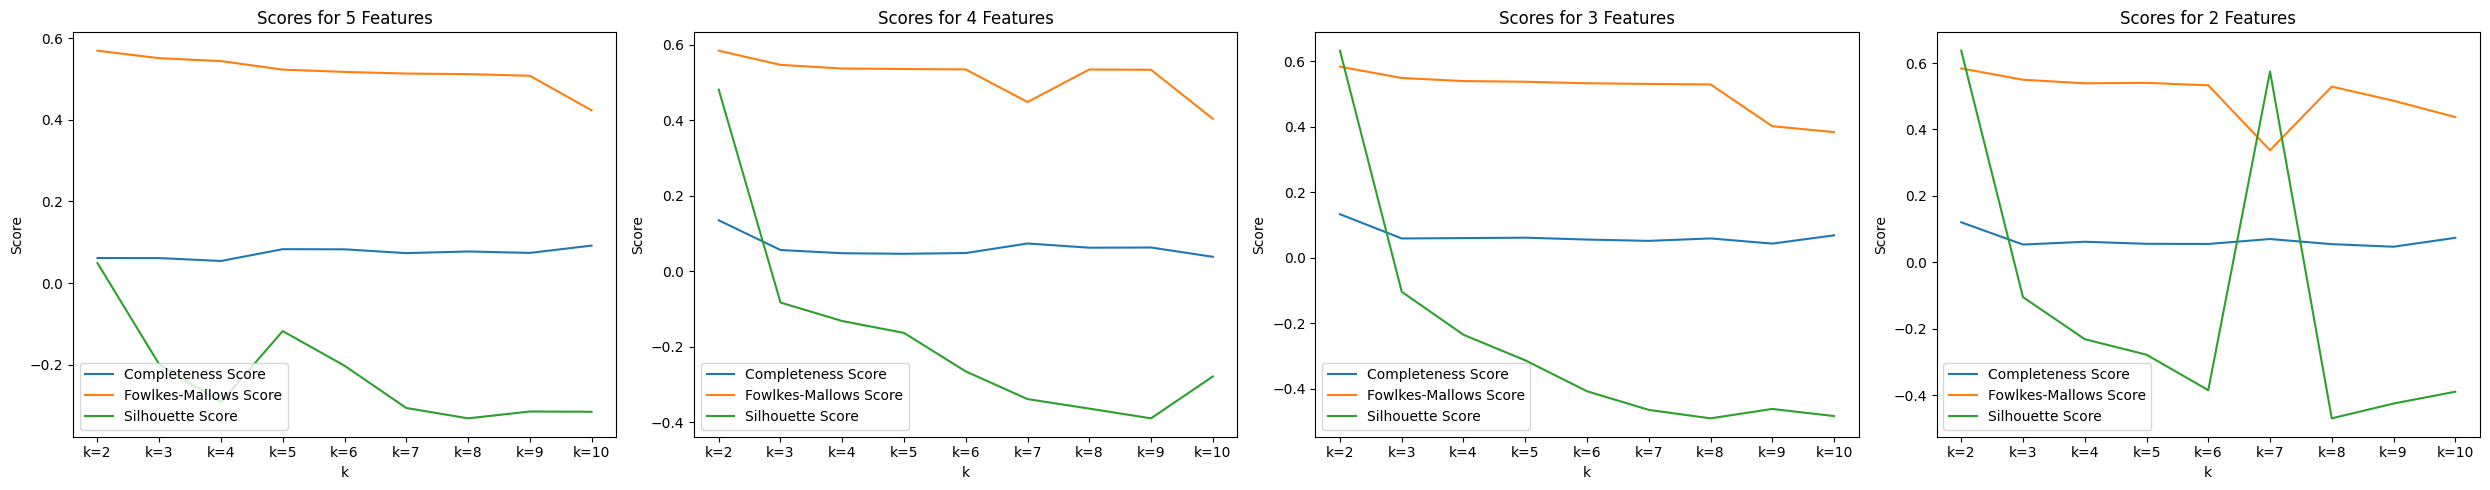

In [12]:
# Plotting the scores for different numbers of features
fig, axes = plt.subplots(1, 4, figsize=(25, 5))

# Plot for 5 features
axes[0].plot(completeness_scores_5features.keys(), completeness_scores_5features.values(), label='Completeness Score')
axes[0].plot(fowlkes_mallows_scores_5features.keys(), fowlkes_mallows_scores_5features.values(), label='Fowlkes-Mallows Score')
axes[0].plot(silhouette_scores_5features.keys(), silhouette_scores_5features.values(), label='Silhouette Score')
axes[0].set_xlabel('k')
axes[0].set_ylabel('Score')
axes[0].set_title('Scores for 5 Features')
axes[0].legend()

# Plot for 4 features
axes[1].plot(completeness_scores_4features.keys(), completeness_scores_4features.values(), label='Completeness Score')
axes[1].plot(fowlkes_mallows_scores_4features.keys(), fowlkes_mallows_scores_4features.values(), label='Fowlkes-Mallows Score')
axes[1].plot(silhouette_scores_4features.keys(), silhouette_scores_4features.values(), label='Silhouette Score')
axes[1].set_xlabel('k')
axes[1].set_ylabel('Score')
axes[1].set_title('Scores for 4 Features')
axes[1].legend()

# Plot for 3 features
axes[2].plot(completeness_scores_3features.keys(), completeness_scores_3features.values(), label='Completeness Score')
axes[2].plot(fowlkes_mallows_scores_3features.keys(), fowlkes_mallows_scores_3features.values(), label='Fowlkes-Mallows Score')
axes[2].plot(silhouette_scores_3features.keys(), silhouette_scores_3features.values(), label='Silhouette Score')
axes[2].set_xlabel('k')
axes[2].set_ylabel('Score')
axes[2].set_title('Scores for 3 Features')
axes[2].legend()

# Plot for 2 features
axes[3].plot(completeness_scores_2features.keys(), completeness_scores_2features.values(), label='Completeness Score')
axes[3].plot(fowlkes_mallows_scores_2features.keys(), fowlkes_mallows_scores_2features.values(), label='Fowlkes-Mallows Score')
axes[3].plot(silhouette_scores_2features.keys(), silhouette_scores_2features.values(), label='Silhouette Score')
axes[3].set_xlabel('k')
axes[3].set_ylabel('Score')
axes[3].set_title('Scores for 2 Features')
axes[3].legend()

plt.tight_layout()
plt.show()